In [1]:
%matplotlib inline
from IPython.display import HTML,Image,SVG,YouTubeVideo

# Linear filtering

In the previous sections, the processed value of a pixel was only a function of its orignal value. In this section, the processed value will also take into account the surrounding pixels as well. Those surrounding pixels are called the neighbourhood of a pixel.

## Neighbourhood

A neighbourhood is defined by a binary structuring element $B$ having an origin. For a specific pixel, which is the gray one for these illustrations, the neighbourhood defined by $B$ is the ensemble of pixels belonging to $B$ when its origin is moved on the pixel of interest.
|Illustration of a structuring element, which origin is marked by a red cross|Application of a structuring element onto a specific pixel|
|:-:|:-:|
|<img src="../data/b1.png" alt="Illustration of a structuring element, which origin is marked by a red cross" title="Illustration of a structuring element, which origin is marked by a red cross" width="200"/>|<img src="../data/b2.png" alt="Application of a structuring element onto a specific pixel" title="Application of a structuring element onto a specific pixel" width="200"/>|<img src="../data/b1.png" alt="Application of a structuring element onto a specific pixel" title="Application of a structuring element onto a specific pixel" width="200"/>|






The structuring element can have any size or shape.The size of the structuring element will often directly impact the process using it, but also the processing time of said process. The cross-shaped structuring element illustrated before is known as the 4-neighbours. The following illustration gives other examples of common structuring elements.
|Examples of structuring elements|
|:-:|
|<img src="../data/b3.png" alt="Examples of structuring elements" title="Examples of structuring elements" width="200"/>

The upper right structuring element is known as the 8-neighbours, which is clearly understandable.  But bigger structuring elements could also be used, such as disks with big radiuses.

But there is an issue when the structuring elements approaches a border of the image : the neighbourhood is not defined when one pixel of $B$ is outside the image ! Which means that the structuring element can't be placed everywhere in the image, and so only the innerpart of the image can by processed.
|Structuring element placed over the edge of an image|Allowed positions of the structuring element|
|:-:|:-:|
|<img src="../data/b5.png" alt="Structuring element placed over the edge of an image" title="Structuring element placed over the edge of an image" width="200"/>|<img src="../data/b6.png" alt="Allowed positions of the structuring element" title="Allowed positions of the structuring element" width="200"/>|

## Local processing

A local processing is a processing done pixel by pixel using a structuring element as neighbourhood. Several local processes exist, and a first one that can be done is a weighted sum of the pixels value inside the neighbourhood. It is called "weighed' because each element of the structuring element is associated with a weight that will influence the whole sum. This local process is also known as the convolution of the image with the structuring element.
|Example of a local weighted sum|
|:-:|
|<img src="../data/conv1.png" alt="Example of a local weighted sum" title="Example of a local weighted sum" width="300"/>|

To give a real example with the image of the cameraman, a mean filter is applied on it. A mean filter is basically the sum of the pixels inside the structuring element, divided by the number of pixels of the structuring element.

C:\Program Files\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


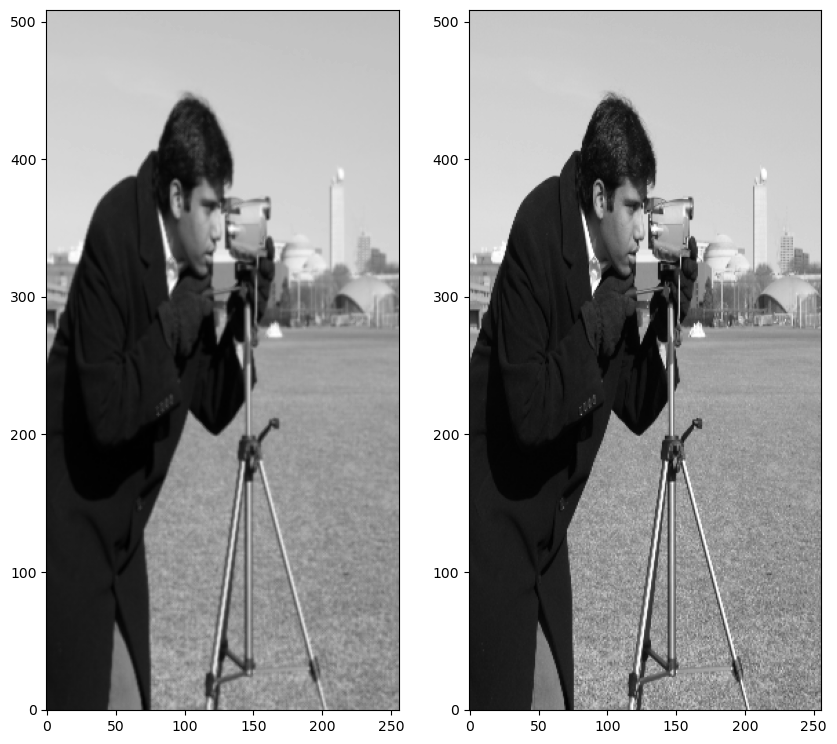

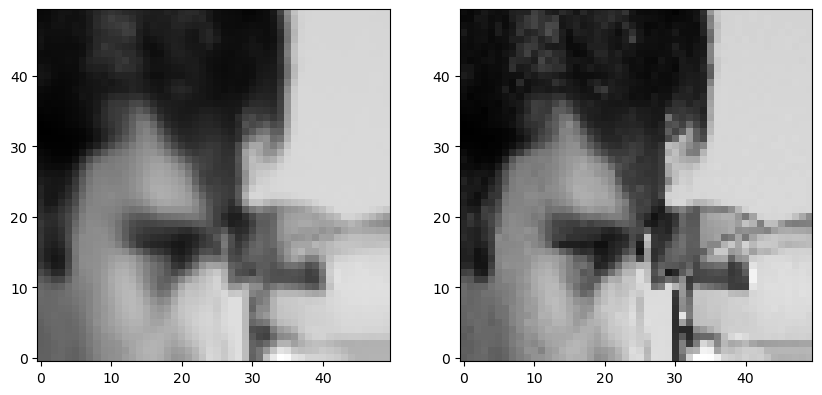

In [2]:
from skimage.morphology import disk
from skimage.data import camera
from skimage.filters.rank import mean
import matplotlib.pyplot as plt
def compare(f,g,roi=None):
    plt.figure(figsize=[10,10])
    plt.subplot(1,2,1)
    plt.imshow(f,cmap=plt.cm.gray)
    plt.gca().invert_yaxis()
    plt.subplot(1,2,2)
    plt.imshow(g,cmap=plt.cm.gray)
    plt.gca().invert_yaxis()
    if roi is not None:
        f = f[roi[0]:roi[1],roi[2]:roi[3]]
        g = g[roi[0]:roi[1],roi[2]:roi[3]]
        plt.figure(figsize=[10,10])
        plt.subplot(1,2,1)
        plt.imshow(f,cmap=plt.cm.gray)
        plt.gca().invert_yaxis()
        plt.subplot(1,2,2)
        plt.imshow(g,cmap=plt.cm.gray)
        plt.gca().invert_yaxis()
g = camera()[-1:2:-1,::2]
f = mean(g,disk(1))
   
compare(f,g,roi=[350,400,100,150])


In the example above, it appears that the noise in the image is smoothened and small details are disappearing. If the radius of the structuring element is increased, The image is even more blurred, and even more details are lost.

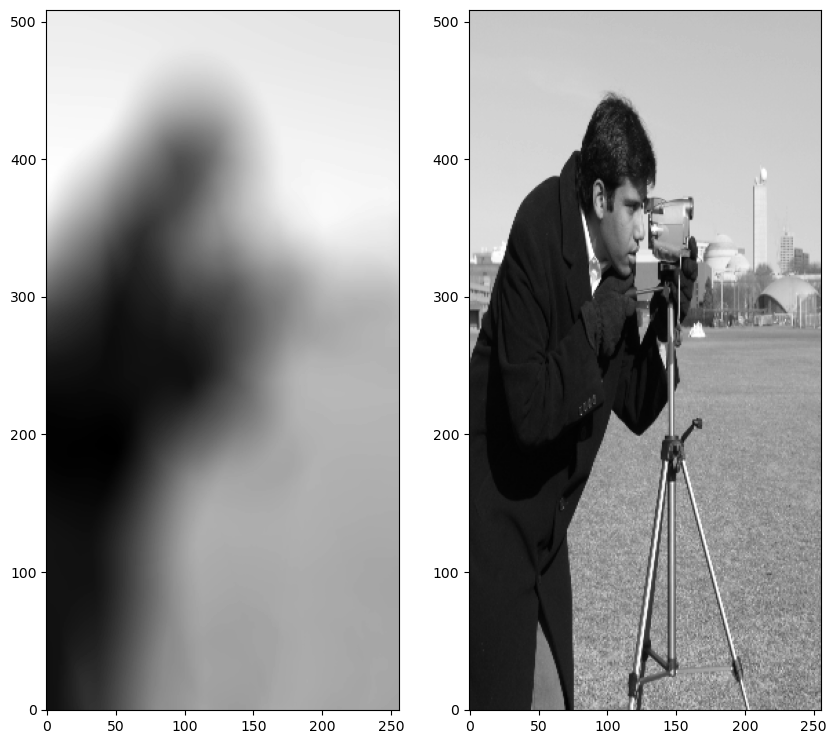

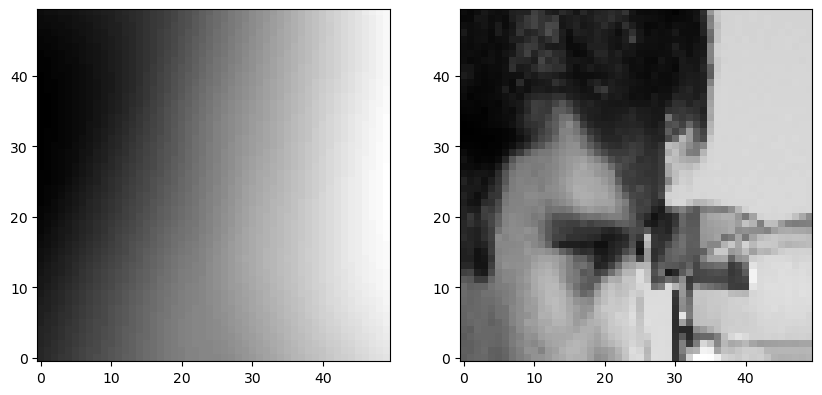

In [3]:
f = mean(g,disk(40))
#plt.imshow(disk(4))
compare(f,g,roi=[350,400,100,150])

The convolution algorithm can be implemented using embedded loops for a structuring element of a size $3 \times 3$, as shown in the typical code below. Because of the embedded nature of the algorithm, as the size of structuring element increases, the number of loops is also increasing, and way faster !
```python
I = [source image]
F = [destination image]
n  = 9
for x in 1:sizex-1:
    for y in 1:sizey-1:
        sum = 0
        for i in -1:+1:
            for j in -1:+1:
                sum += I[n+i,m+j]
        F[n,m] = sum/n
```

## Fourier transform

### Recall

Fourier analysis allows to play with a signal in the frequency domain. For a on-dimensional or more simply 1D signal, the continuous Fourier transform of a function $f(x)$ is given by the following equation :
$$
F(u)= \mathcal{F(f(x))} = \int_{-\infty}^\infty f(x) e^{- i \left( 2 \pi u x \right)} dx
$$
with $ e^{- i \left( 2 \pi u x \right)} = \cos{\left( 2 \pi u x \right)} - i \sin{\left( 2 \pi u x \right)}$ and $u$ is a variable is in the frequency domain.

In general, the Fourier transform of a real signal is complex : $F(u) = |F(u)| e^{i  \phi \left( u \right)}$ with an amplitude $|F(u)|$ and a phase $\phi \left( u \right)$, given by the following system.
$$
\begin{cases}
    |F(u)| = \sqrt{\left[ R \left( u \right) \right] ^{2} + \left[ I \left( u \right) \right] ^{2}} \\
    \phi \left( u \right) = \tan^{-1} \left( \frac{I \left( u \right)}{R \left( u \right)} \right)
\end{cases}
$$

The inverse Fourier transform is given by the following equation.
$$
f(x) = \mathcal{F}^{-1} \left( F(u) \right) =  \int_{-\infty}^\infty F(u) e^{ i \left( 2 \pi u x \right) } du
$$

The magnitude function $|F(u)|^2$ is called the Fourier spectrum  or power spectrum of $f(x)$. The power spectrums of several step functions are proposed as examples below.

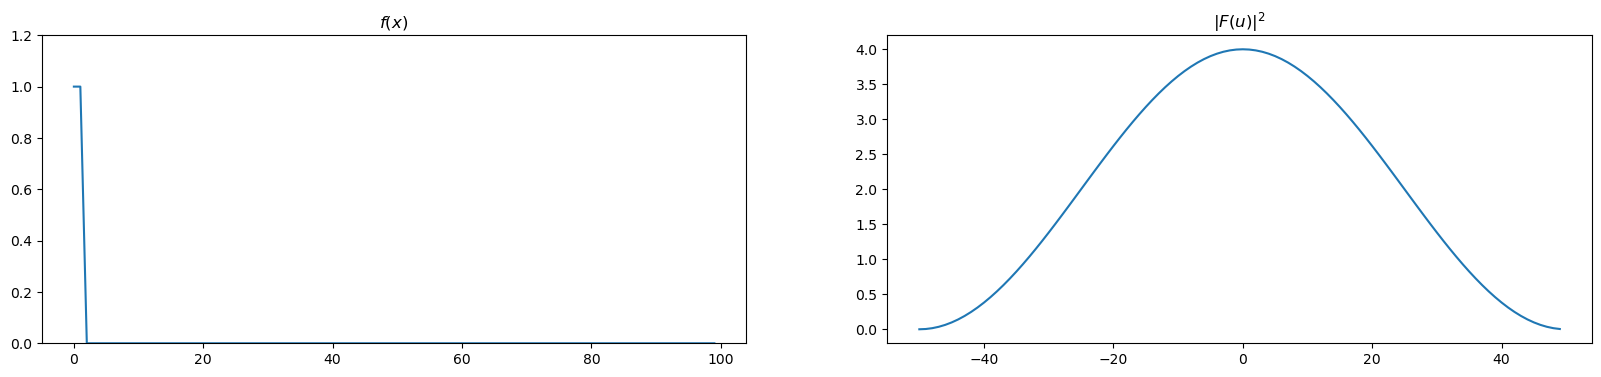

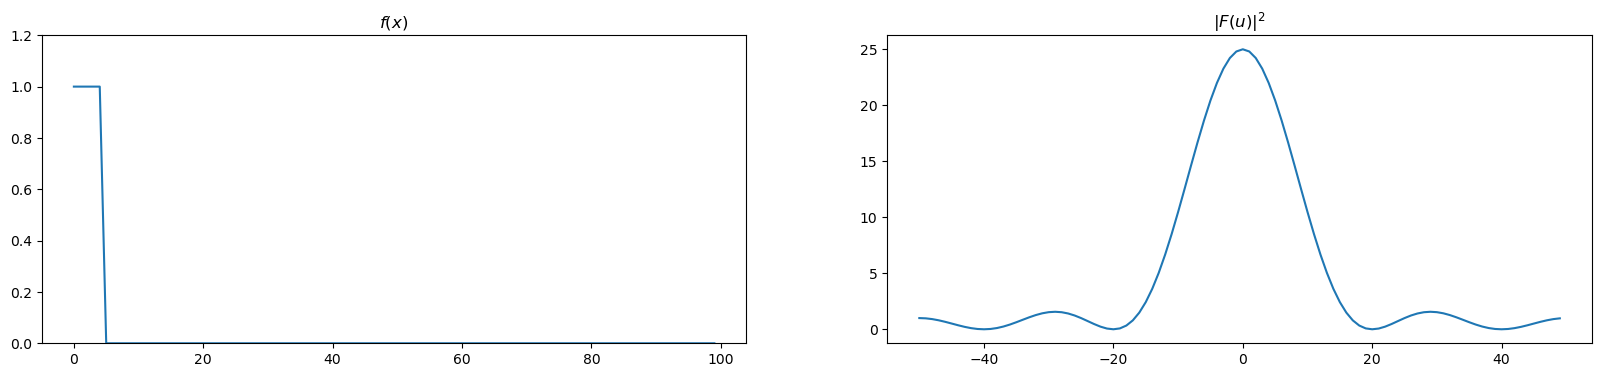

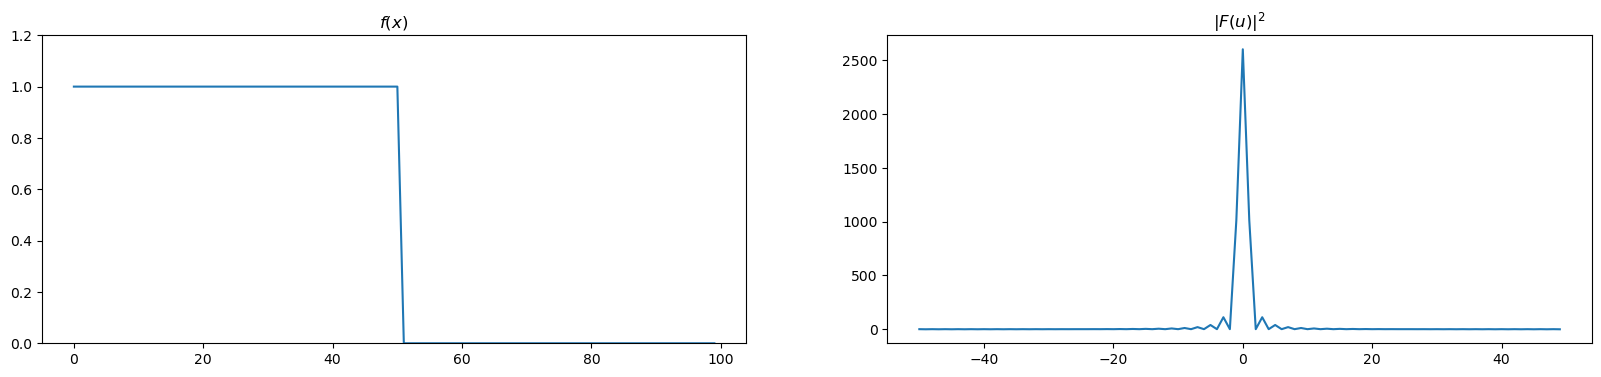

In [4]:
import numpy as np
from numpy.fft import fft,fftshift,ifftshift
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def step_power(length):
    nsample = 100
    t = np.arange(nsample)
    x = t<=length
    fx = fftshift(fft(x))
    power = np.abs(fx)**2 
    angle = np.angle(fx)
    
    plt.figure(figsize=[20,4])
    plt.subplot(1,2,1)
    plt.gca().set_ylim([0,1.2])
    plt.title('$f(x)$')
    plt.plot(x)
    plt.subplot(1,2,2)
    plt.plot(np.arange(-nsample/2,nsample/2),power);
    plt.title('$|F(u)|^2$')
    
step_power(1)
step_power(4)
step_power(50)

The next illustrations are the power spectrum of several sine waves, each with different wave lengths.
> The positions of the peaks in the Fourier power spectrum correspond to the frequency of the considered wave.

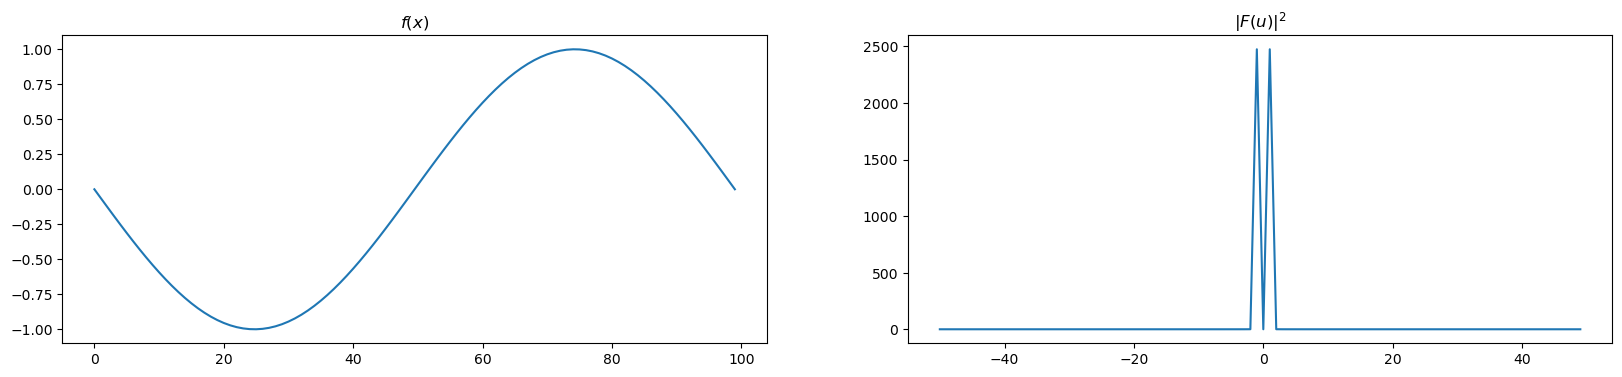

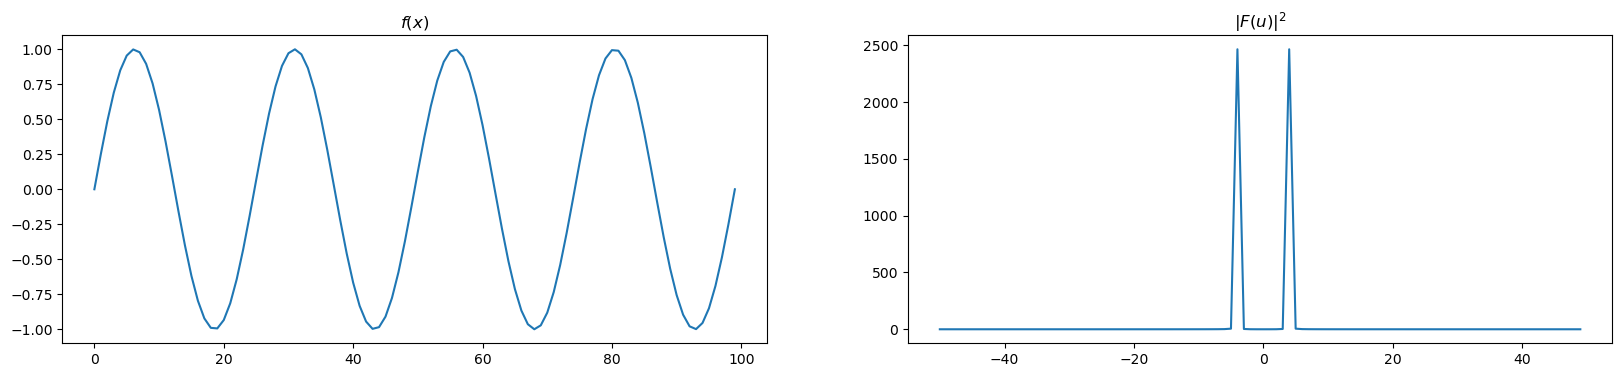

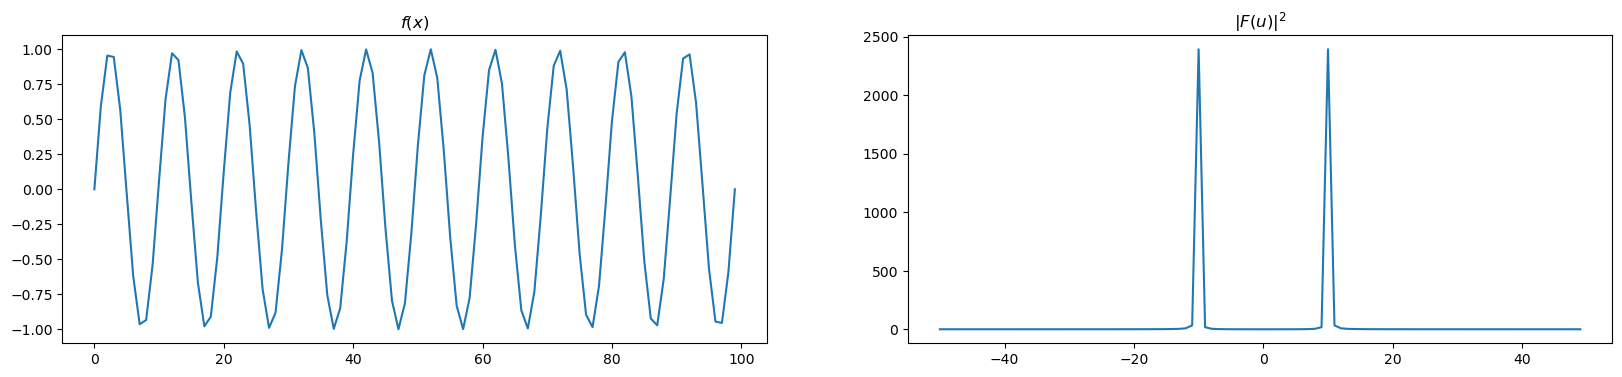

In [5]:
def sine_power(freq):
    nsample = 100
    t = np.linspace(-np.pi,np.pi,nsample)
    x = np.sin(t*freq)
    fx = fftshift(fft(x))
    power = np.abs(fx)**2 
    angle = np.angle(fx)
    
    plt.figure(figsize=[20,4])
    plt.subplot(1,2,1)
    plt.gca().set_ylim([-1.1,1.1])
    plt.title('$f(x)$')
    plt.plot(x)
    plt.subplot(1,2,2)
    plt.plot(np.arange(-nsample/2,nsample/2),power);
    plt.title('$|F(u)|^2$')
    
sine_power(1)
sine_power(4)
sine_power(10)

As a final example, the illustrations below represent the power spectrums of two different mixes of three sine waves.
> Again, the positions of the peaks in the Fourier power spectrum correspond to the frequencies of the used waves.

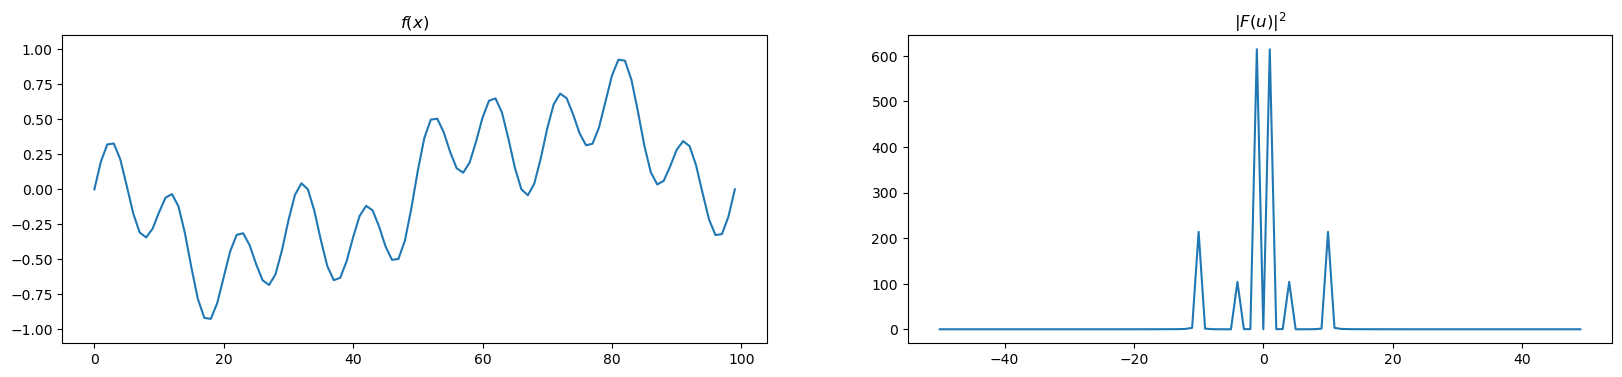

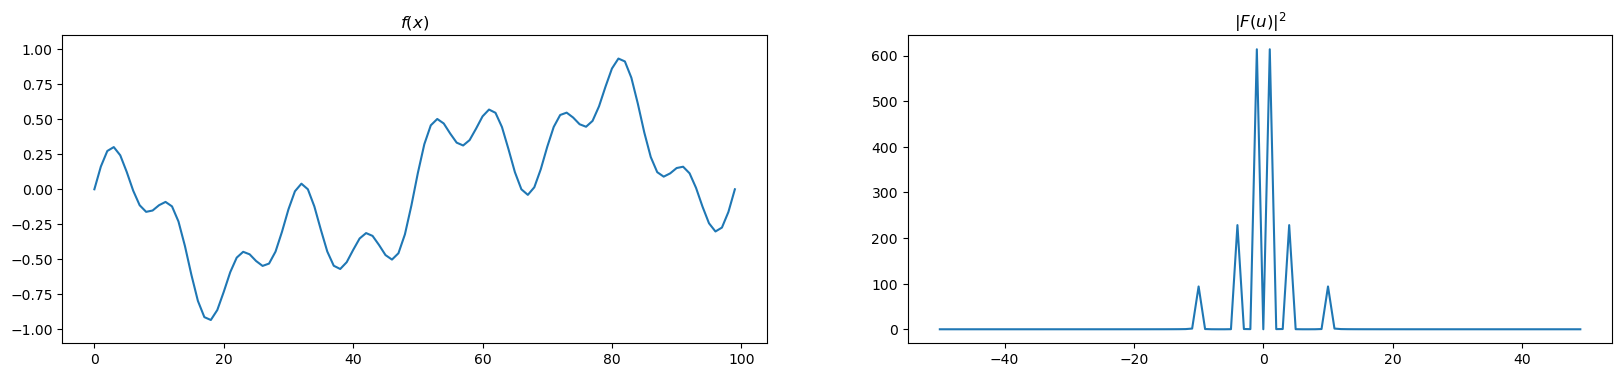

In [6]:
def mix_sine_power(freq):
    nsample = 100
    t = np.linspace(-np.pi,np.pi,nsample)
    x = np.zeros_like(t)
    for f,a in freq:
        x += np.sin(t*f)*a
    fx = fftshift(fft(x))
    power = np.abs(fx)**2 
    angle = np.angle(fx)
    
    plt.figure(figsize=[20,4])
    plt.subplot(1,2,1)
    plt.gca().set_ylim([-1.1,1.1])
    plt.plot(x)
    plt.title('$f(x)$')
    plt.subplot(1,2,2)
    plt.plot(np.arange(-nsample/2,nsample/2),power);
    plt.title('$|F(u)|^2$')
    
mix_sine_power([(1,.5),(4,.2),(10,.3)])
mix_sine_power([(1,.5),(4,.3),(10,.2)])


### 2D Fourier transform

Similarily as before, the 2D Fourier transform is defined by the following equation.
$$
F(u,v) = \mathcal F \left( f(x,y) \right) =  \int_{-\infty}^\infty \int_{-\infty}^\infty f(x,y)  e^{- i \left( 2 \pi (u x + v y) \right)} dx dy
$$

The equivallent step transform is given through the illustrations below. The original image consist of a $128 \times 128$ image containing zeros everywhere except in its center (a $2 \times 2$ square).

C:\Users\HP\AppData\Local\Temp\ipykernel_25416\412719814.py:12: DeprecationWarning: Converting `np.complex` to a dtype is deprecated. The current result is `complex128` which is not strictly correct.
  r = np.zeros((n,n),dtype = np.complexfloating)


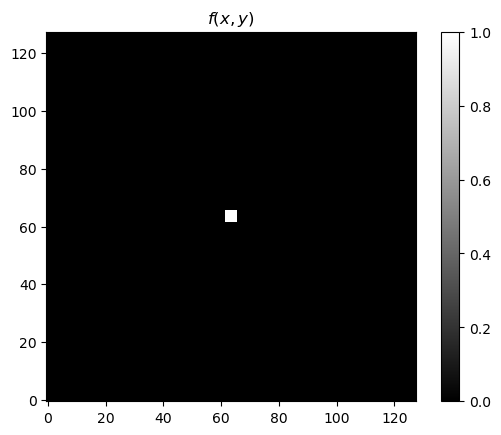

In [7]:
import matplotlib.pyplot as plt
import matplotlib.pylab as plab
import matplotlib.cm as cm
import scipy as scp
import numpy as np
from numpy.fft import fft2,ifft2,fftshift,ifftshift
from scipy import ndimage
from mpl_toolkits.mplot3d import axes3d

w = 2
n = 128
r = np.zeros((n,n),dtype = np.complexfloating)
r[int(n/2)-w:int(n/2)+w,int(n/2)-w:int(n/2)+w] = 1.0 + 0.0j

F = fft2(r) #2D FFT of the image
rr = ifft2(F) #2D inverse FFT of F 

real_part = F.real
imag_part = F.imag

fig = plt.figure(1)
plt.imshow(r.real,interpolation='nearest',origin='lower',cmap=cm.gray)
plt.colorbar()
plt.title('$f(x,y)$');

In the Fourier spectrum, the zero spatial frequency is in the center. As shown by the plot, most of the energy is in the central part of th the spectrum : a great part of the image has no transition, which is the great part of black surrounding the white square. However, because of the sharp border of the white square, inducing a big transition, there are also higher frequencies available. The figures below illustrate the $\sin(x)/x$ aspect of the power spectrum of the 2D step function.

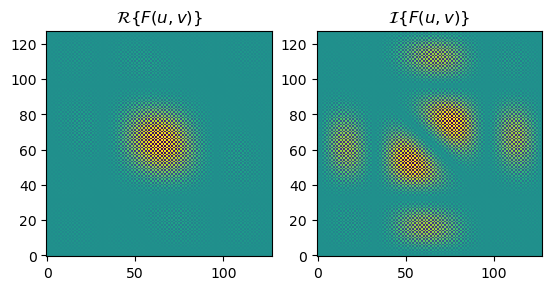

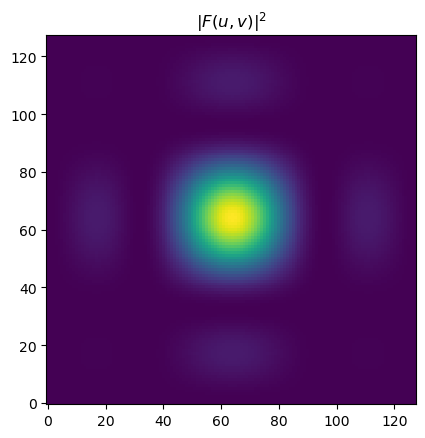

In [8]:
fig = plt.figure(2)
plt.subplot(1,2,1)
plt.imshow(fftshift(real_part),interpolation='nearest',origin='lower')
plt.title('$\mathcal{R} \{ F(u,v)\}$')

plt.subplot(1,2,2)
plt.imshow(fftshift(imag_part),interpolation='nearest',origin='lower')

plt.title('$\mathcal{I} \{ F(u,v)\}$')

fig = plt.figure(3)
plt.imshow(np.abs(fftshift(F))**2,interpolation='nearest',origin='lower')

plt.title('$|F(u,v)|^2$');

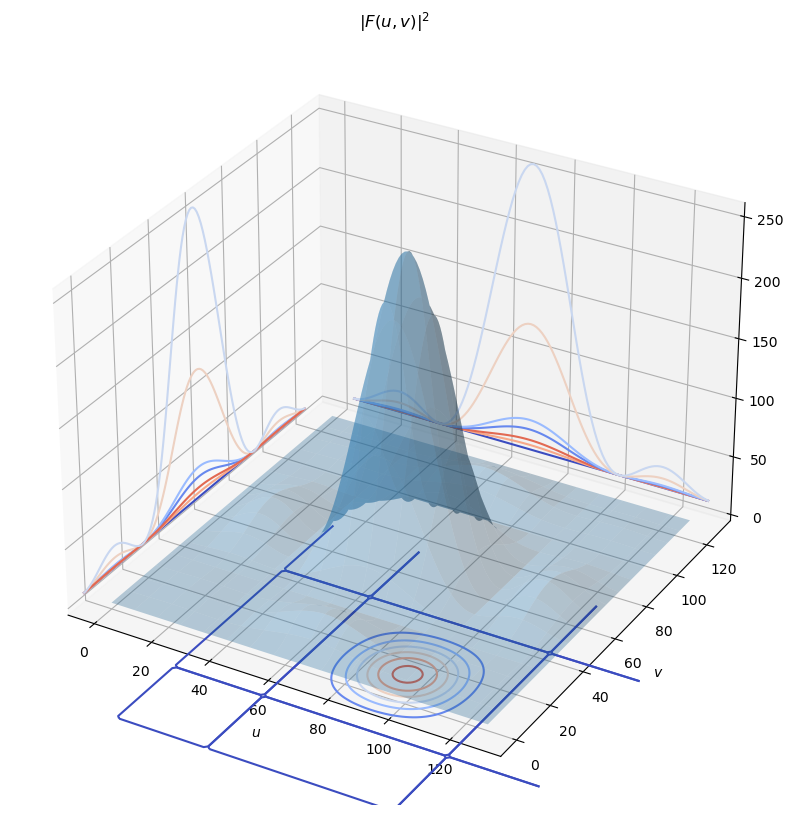

In [9]:
fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(projection='3d')
X,Y = np.meshgrid(range(n),range(n))
Z = np.abs(fftshift(F))**2
ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)
cset = ax.contour(X, Y, Z, zdir='z', offset=-100, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-10, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=140, cmap=cm.coolwarm)

plt.xlabel('$u$')
plt.ylabel('$v$')
plt.title('$|F(u,v)|^2$');

The inverse Fourier transform of the last result is illustrated below : the original image is gotten back.

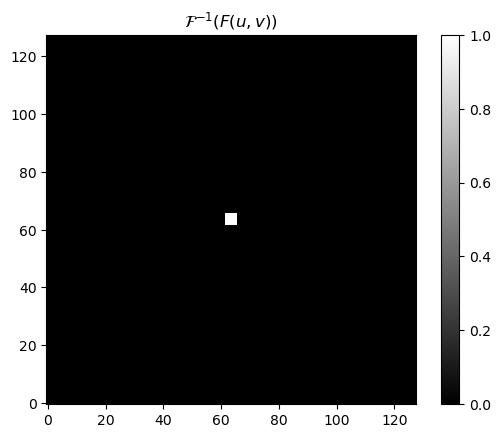

In [10]:
fig = plt.figure()
plt.imshow(rr.real,interpolation='nearest',origin='lower',cmap=cm.gray)
plt.colorbar()
plt.title('$\mathcal{F}^{-1}(F(u,v))$');

### Phase and amplitude

Noise can be added to the amplitude or the phase. This results in the addition of artifacts in the image, like it has been scrapped. These artifacts are different if the noise is added either on the amplitude or the phase. The next illustrations show the difference between the two scenarios.

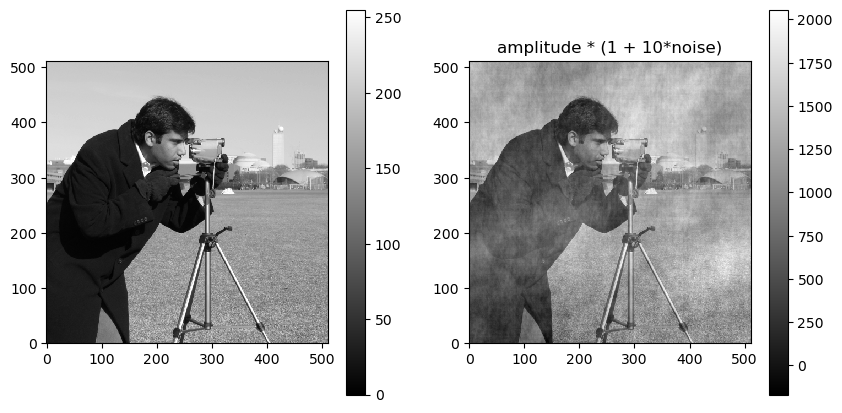

In [11]:
ima = camera()[-1::-1,:]
F = fft2(ima)
amplitude = np.abs(F)
angle = np.angle(F)

noise = np.random.random(ima.shape)
n_amplitude = amplitude * (1+10*noise)

real = n_amplitude * np.cos(angle)
imag = n_amplitude * np.sin(angle)

n_F = real + 1j *imag

n_ima = np.real(ifft2(n_F))

fig = plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
plt.imshow(ima, cmap="gray", interpolation='nearest',origin='lower')
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(n_ima, cmap="gray",interpolation='nearest',origin='lower')
plt.colorbar();
plt.title('amplitude * (1 + 10*noise)');


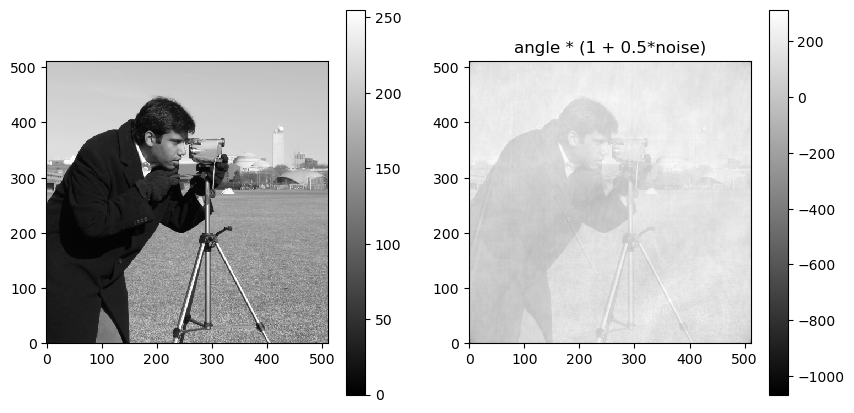

In [12]:
ima = camera()[-1::-1,:]
F = fft2(ima)
amplitude = np.abs(F)
angle = np.angle(F)

noise = np.random.random(ima.shape)
n_angle = angle * (1+.5*noise)


real = amplitude * np.cos(n_angle)
imag = amplitude * np.sin(n_angle)

n_F = real + 1j *imag

n_ima = np.real(ifft2(n_F))

fig = plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
plt.imshow(ima, cmap="gray",interpolation='nearest',origin='lower')
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(n_ima, cmap="gray",interpolation='nearest',origin='lower')
plt.colorbar();
plt.title('angle * (1 + 0.5*noise)');


### Discrete Fourier transform

The discrete Fourier transform is an alternative of the Fourier transform used for discrete signals. If $f(x)$ is a discrete function with $N$ samples, thus $x = 0,\dots,N-1$, the discrete Fourier transform is given by the following equation.
$$
F(u) = \frac{1}{N} \sum_{x=0}^{N-1} f(x) e^{- i \left( \frac{2 \pi u x}{N} \right)}
$$

The corresponding inverse transform is given by the next equation.
$$
f(x) = \sum_{u=0}^{N-1}F(u) e^{i \left( \frac{2 \pi u x}{N} \right)}
$$

The former considerations are for a 1D discrete function. The extensions for 2D functions, both the discrete Fourier transform and the inverse discrete Fourier transform are respectively given by the following equations.
$$
\begin{align*}
F(u,v) &= \frac{1}{MN} \sum_{x=0}^{M-1} \sum_{y=0}^{N-1} f(x,y) e^{- i \left[2 \pi \left(\frac{u x}{M} + \frac{v y}{N} \right)\right]} \\
f(x,y) &= \sum_{u=0}^{M-1}\sum_{v=0}^{N-1}F(u,v) \, e^{i \left[2 \pi \left(\frac{u x}{M} + \frac{v y}{N} \right)\right]}
\end{align*}
$$

### The Fast Fourier Transform algorithm

The Fast Fourier Transform algorithm, or more simply the FFT algoritm, enables to drastically diminish the number of operation for the discrete Fourier transform of a function. Without going into details, the complexity of the original direct Fourier transform algorithm goes from $N^2$ to $N \log_2 \left( N \right)$ for FFT method, which is a major improvement especially when image size $N$ is big.

Because images are discrete functions, and because the main goal is to apply different kinds of convolutions with them, if the size of the structuring element is big, one may use the FFT in place of naïve convolution techniques as described below.

## Convolution

The local processing of an image as described before is in fact a simple convolution. Thanks to the properties of the Fourier domain, a convolution can be computed in an other way. Indeed, the convolution of two function is defined as follows.
$$
f(x) \ast g(x) = \int _{-\infty} ^{+\infty} f(u) g(x-u) du
$$
The corresponding operation in the frequency domain is deduced by the properties of the Fourier transform.
$$
f(x) \ast g(x) \longrightarrow F(u) \cdot G(u)
$$
The latter equation explained with words, the convolution of two signals in the temporal domain is equivallent to a term by term product of the Fourier transforms of said signals in the frequency domain. Similar results can be deduced for 2D signals, like images.
$$
f(x,y) \ast g(x,y) \longrightarrow F(u,v) \cdot G(u,v)
$$
Again using words, the convolution of an image $f$ by a structuring element $g$ simply consists of the computation of two discrete Fourier transform, a simple term-by-term matrix product and an inverse discrete Fourier transform. The following example illustrates the application of a low pass filter : only frequencies near the center of the image are kept.

C:\Users\HP\AppData\Local\Temp\ipykernel_25416\2686724456.py:12: DeprecationWarning: Converting `np.complex` to a dtype is deprecated. The current result is `complex128` which is not strictly correct.
  s = np.zeros(im.shape,dtype = np.complexfloating)
C:\Users\HP\AppData\Local\Temp\ipykernel_25416\2686724456.py:16: DeprecationWarning: Converting `np.complex` to a dtype is deprecated. The current result is `complex128` which is not strictly correct.
  c = np.zeros(im.shape,dtype = np.complexfloating)
C:\Users\HP\AppData\Local\Temp\ipykernel_25416\2686724456.py:24: DeprecationWarning: Converting `np.complex` to a dtype is deprecated. The current result is `complex128` which is not strictly correct.
  c = c.astype(np.complexfloating)/(255.0+0j)
C:\Users\HP\AppData\Local\Temp\ipykernel_25416\2686724456.py:26: DeprecationWarning: Converting `np.complex` to a dtype is deprecated. The current result is `complex128` which is not strictly correct.
  F1 = fft2(im.astype(np.complexfloating))


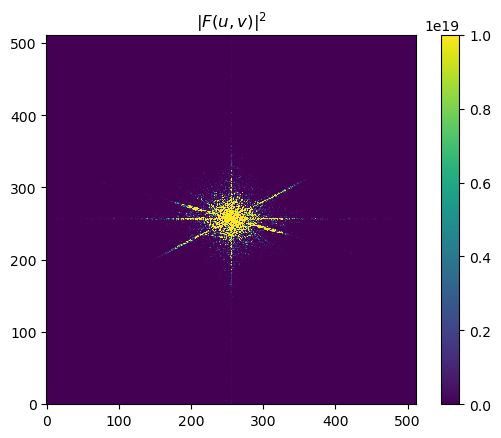

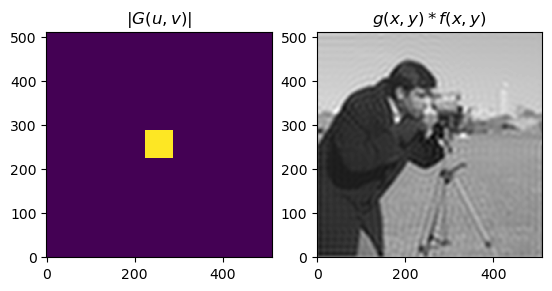

In [13]:
from skimage.data import camera
from skimage.filters import rank as skr
from skimage.morphology import disk

im = camera()[-1::-1,::]

w,h = im.shape

n = 32

#square filter
s = np.zeros(im.shape,dtype = np.complexfloating)
s[int(w/2)-n:int(w/2)+n,int(h/2)-n:int(h/2)+n] = 1.0 + 0.0j

#circular filter 
c = np.zeros(im.shape,dtype = np.complexfloating)
for i in range(w):
    for j in range(h):
        if ((i-w/2)**2 + (j-h/2)**2)<(n*n):
            c[i,j] = 1.0 + 0.0j
            
#smooth filter borders
c = skr.mean(np.real(c*255).astype('uint8'),disk(10))
c = c.astype(np.complexfloating)/(255.0+0j)

F1 = fft2(im.astype(np.complexfloating))
F3 = F1*ifftshift(s)
F4 = F1*ifftshift(c)

#high pass using the complement of c
F5 = F1*ifftshift((1.0 + 0j)-c)

psF1 = (F1**2).real

low_pass_rec = ifft2(F3) 
low_pass_circ = ifft2(F4)
high_pass_circ = ifft2(F5) 

fig = plt.figure(1)
plt.imshow(np.abs(fftshift(psF1))**2,interpolation='nearest',origin='lower',vmax = 10e18)
plt.title('$|F(u,v)|^2$')
plt.colorbar()

fig = plt.figure(2)
plt.subplot(1,2,1)
plt.imshow(s.real,interpolation='nearest',origin='lower')
plt.title('$|G(u,v)|$')
plt.subplot(1,2,2)
plt.imshow(low_pass_rec.real,interpolation='nearest',origin='lower',cmap=cm.gray)
plt.title('$g(x,y)*f(x,y)$');

The presence of oscillations in the filtered image is due to the sharpness of the used filter, which is the square showed above. The following example uses the same low-pass filter but with smoother borders.

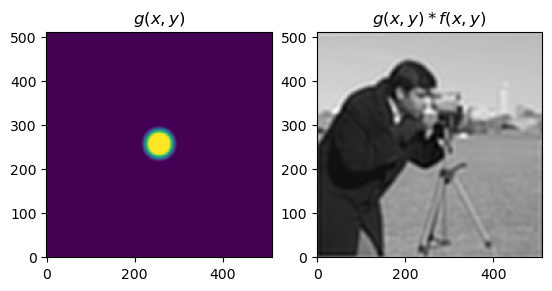

In [14]:
fig = plt.figure(3)
plt.subplot(1,2,1)
plt.imshow(c.real,interpolation='nearest',origin='lower')
plt.title('$g(x,y)$')
plt.subplot(1,2,2)
plt.imshow(low_pass_circ.real,interpolation='nearest',origin='lower',cmap=cm.gray)
plt.title('$g(x,y)*f(x,y)$');

To give another example, if the central part of the spectrum is discarded, a high pass filter is formed, which means that only borders in the image are kept.

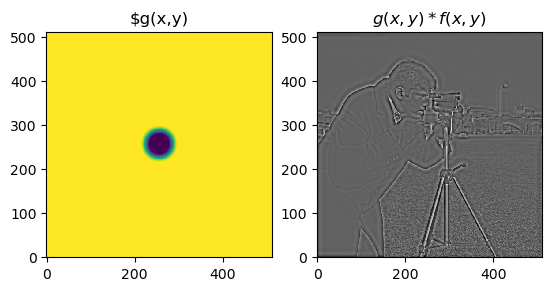

In [15]:
fig = plt.figure(4)
plt.subplot(1,2,1)
plt.imshow(1.0-c.real,interpolation='nearest',origin='lower')
plt.title('$g(x,y)')
plt.subplot(1,2,2)
plt.imshow(high_pass_circ.real,interpolation='nearest',origin='lower',cmap=cm.gray)
plt.title('$g(x,y)*f(x,y)$');

## Correlation

Similarily, the correlation of two signals can benefit from the Fourier domain properties. Correlation is defined by the following equation :
$$
f(x) \circ g(x) = \int _{-\infty} ^{\infty} f^{\ast}(u) g(x+u) du
$$
where $f^*$ is the conjugate of the complex function $f$. For a real image, $f^{\ast} = f$. The corresponding operation in the frequency domain is thus given by the next equation
$$
f(x) \circ g(x) \longrightarrow F^{\ast}(u) \cdot G(u)
$$
where $F^*$ is the conjugate of the complex function $F$.

C:\Users\HP\AppData\Local\Temp\ipykernel_25416\2814478904.py:4: DeprecationWarning: Converting `np.complex` to a dtype is deprecated. The current result is `complex128` which is not strictly correct.
  im = camera().astype(np.complexfloating)
C:\Users\HP\AppData\Local\Temp\ipykernel_25416\2814478904.py:10: DeprecationWarning: Converting `np.complex` to a dtype is deprecated. The current result is `complex128` which is not strictly correct.
  g = np.zeros((m,n),dtype = np.complexfloating)


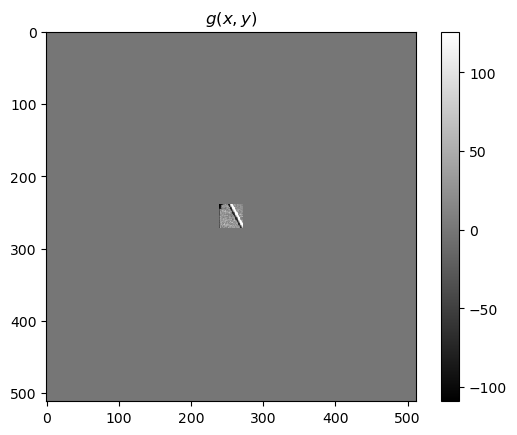

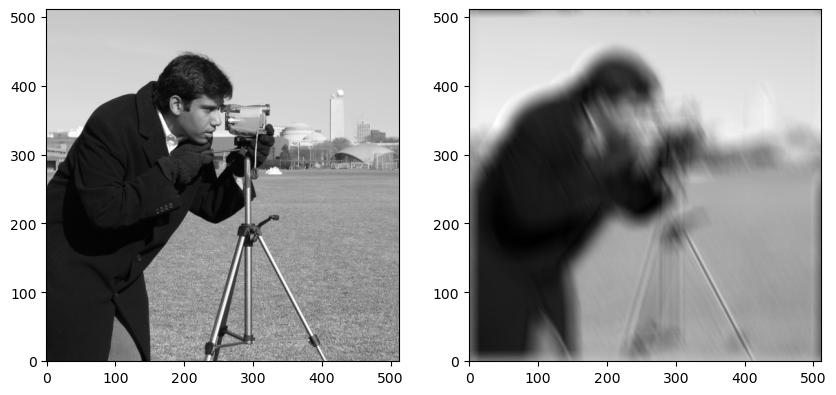

In [16]:
from skimage.data import camera


im = camera().astype(np.complexfloating)
target_center = (314,355)
w = 16
crop = im[target_center[1]-w:target_center[1]+w,target_center[0]-w:target_center[0]+w]
m,n = im.shape

g = np.zeros((m,n),dtype = np.complexfloating)
g[int(n/2)-w:int(n/2)+w,int(m/2)-w:int(m/2)+w] = crop - np.mean(im) + .0j

#normalize
f = im-np.mean(im)


plt.figure(2)
plt.imshow(g.real,interpolation='nearest',cmap=cm.gray)
plt.colorbar()
plt.title('$g(x,y)$');

F = fft2(f)
G = fft2(np.conjugate(g))

R = F*G
r = fftshift(np.real(ifft2(R)))

corr = 255*((r-np.min(r))/(np.max(r)-np.min(r)))
#corr = 255*(255*((r-np.min(r))/(np.max(r)-np.min(r)))>250)

compare(np.real(im[-1::-1,:]),np.real(corr[-1::-1,:]))

## Adapted filter

Un filtre adaptatif est un système avec un filtre linéaire dont la fonction de transfert est contrôlée par des paramètres variables et un moyen d'ajuster ces paramètres selon un algorithme d'optimisation. En raison de la complexité des algorithmes d'optimisation, presque tous les filtres adaptatifs sont des filtres numériques. Les filtres adaptatifs sont nécessaires pour certaines applications parce que certains paramètres du traitement souhaité (par exemple, l'emplacement des surfaces réfléchissantes dans un espace réverbérant) ne sont pas connus à l'avance ou changent. Le filtre adaptatif en boucle fermée utilise une rétroaction sous la forme d'un signal d'erreur pour affiner sa fonction de transfert.

De manière générale, le processus adaptatif en boucle fermée implique l'utilisation d'une fonction objectif, qui est un critère de performance optimale du filtre, pour alimenter un algorithme, qui détermine comment modifier la fonction de transfert du filtre pour minimiser le coût à l'itération suivante. La fonction de coût la plus courante est le carré moyen du signal d'erreur.

Avec l'augmentation de la puissance des processeurs de signal numérique (DSP), les filtres adaptatifs sont devenus beaucoup plus courants et sont maintenant utilisés couramment dans des appareils tels que les téléphones mobiles et autres appareils de communication, les caméscopes et les appareils photo numériques, ainsi que les équipements de surveillance médicale.

C:\Users\HP\AppData\Local\Temp\ipykernel_25416\1441654596.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  im = imread('../data/moire1.png').astype(np.float)


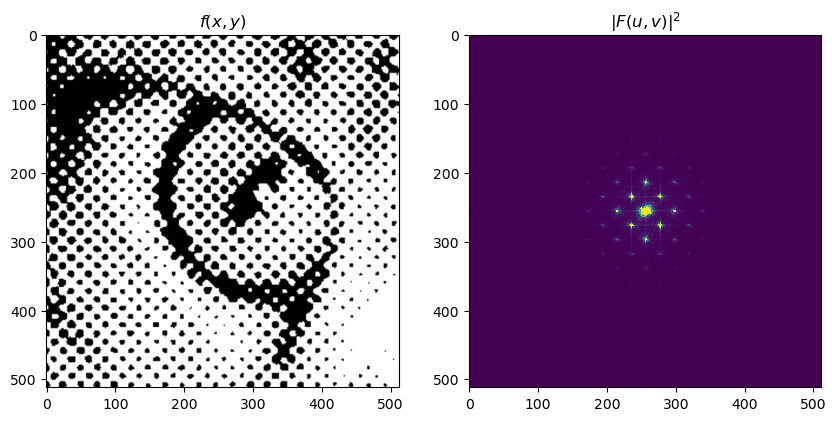

In [17]:
from skimage.io import imread
im = imread('../data/moire1.png').astype(np.float)
f = fft2(im)

power = fftshift(np.abs(f)**2)
pmax = np.max(power)

plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
plt.imshow(im,cmap = cm.gray)
plt.title('$f(x,y)$');
plt.subplot(1,2,2)
plt.imshow(power,vmin=0,vmax=pmax/5000.);
plt.title('$|F(u,v)|^2$');